In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
encoding= {"HOME":0, "AWAY":1, "DRAW":2}
df = pd.read_csv('dataset.csv')
df

,winrate_home,winrate_away,rank_home,rank_away,head_to_head,home_prob,draw_prob,away_prob,game_conclusion
0,-0.689655,-0.769231,0.250,1.375,1.50,0.377894,-0.215346,-0.257585,0
1,0.689655,0.769231,0.875,-0.250,0.00,-1.553156,-1.121395,2.144153,1
2,0.000000,0.000000,-0.750,0.500,0.00,-0.286949,0.283720,0.226528,0
3,-0.103448,1.038462,1.125,0.500,0.00,-0.906443,0.385151,0.978123,2
4,0.655172,1.230769,-0.375,0.875,0.00,-0.362466,0.367991,0.371087,2
5,0.862069,-1.269231,1.000,0.750,1.00,-0.022286,0.185838,0.045793,1
6,0.344828,0.384615,0.000,-0.625,0.00,-0.610803,1.375059,0.255320,0
7,0.586207,-0.615385,-0.500,0.125,0.00,0.941307,-1.064767,-0.586510,0
8,0.655172,0.500000,-0.375,0.250,0.00,1.200778,-1.525296,-0.887236,2
9,0.862069,-0.961538,0.000,0.250,1.25,0.377894,-0.723759,-0.079931,1


In [4]:
def encode(labels): 
    one_hot_label = np.zeros((len(labels),3))
    for i in range(len(labels)):
        one_hot_label[i, labels[i]] = 1
    
    return one_hot_label

In [5]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

x = df.drop('game_conclusion',1)
y = df['game_conclusion']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = encode(np.array(y_train))

Using TensorFlow backend.


In [6]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x_train, y_train)
print(model.feature_importances_)

[0.12319555 0.12526416 0.1137229  0.11714881 0.04415472 0.17441211
 0.13861726 0.16348449]


In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def smape(A, F):
    summ = 0
    for i in range(len(A)):
        tmp = (abs(A[i])+abs(F[i])) / 2
        if tmp == 0:
            continue
        summ += (abs(F[i]- A[i]) / tmp)
    return (1/len(A)) * summ

def plot_regression(actual, pred):
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(actual, pred)))
    print('Mean Absolute Error:', mean_absolute_error(actual, pred))

    plt.figure(figsize=(12,6))
    plt.plot(actual[:50])
    plt.plot(pred[:50])
    plt.legend(['actual', 'prediction'])
    print('Plot is only for first 50 values')

In [8]:
import time
from sklearn.metrics import accuracy_score
def regression(model):
    start_time = time.time()
    
    var_model = model
    var_model.fit(x_train, y_train)
    y_pred = var_model.predict(x_test)
    y_pred = [np.argmax(y) for y in y_pred]
    elapsed_time = time.time() - start_time
    print('Algoritma berjalan selama: ',elapsed_time,' detik')
    print('Akurasi algoritma',accuracy_score(y_test,y_pred)*100,"%")
    plot_regression(list(y_test), y_pred)
    return y_pred, y_test

Algoritma berjalan selama:  0.04189491271972656  detik
Akurasi algoritma 39.45205479452055 %
Root Mean Squared Error: 1.140175425099138
Mean Absolute Error: 0.836986301369863
Plot is only for first 50 values


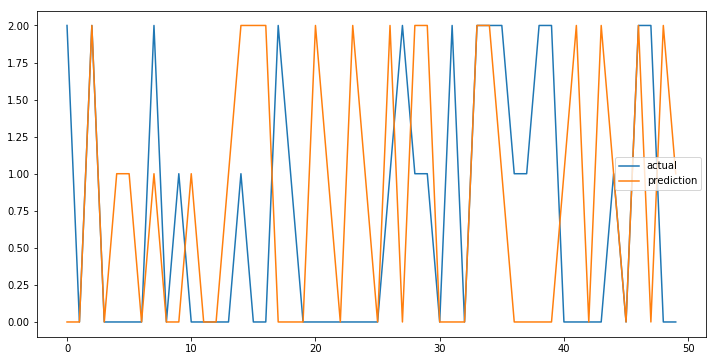

In [9]:
from sklearn.tree import DecisionTreeRegressor
y_pred, y_test = regression(DecisionTreeRegressor())

Algoritma berjalan selama:  0.9937217235565186  detik
Akurasi algoritma 50.34246575342466 %
Root Mean Squared Error: 1.0885455924532124
Mean Absolute Error: 0.726027397260274
Plot is only for first 50 values


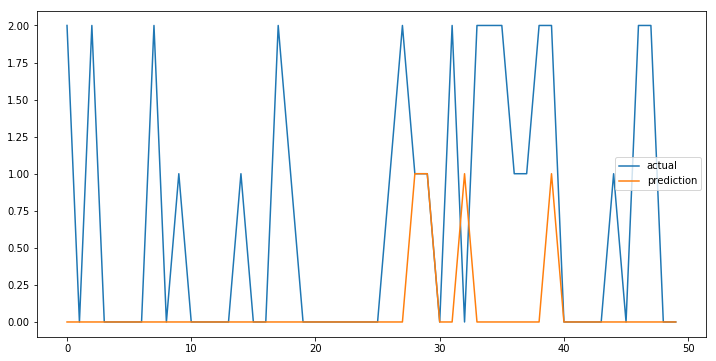

In [10]:
from sklearn.neural_network import MLPClassifier
y_pred = regression(MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 3), random_state=1))

/home/sangbijaksana/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Algoritma berjalan selama:  4.465576887130737  detik
Akurasi algoritma 50.41095890410959 %
Root Mean Squared Error: 1.0891746278090642
Mean Absolute Error: 0.726027397260274
Plot is only for first 50 values


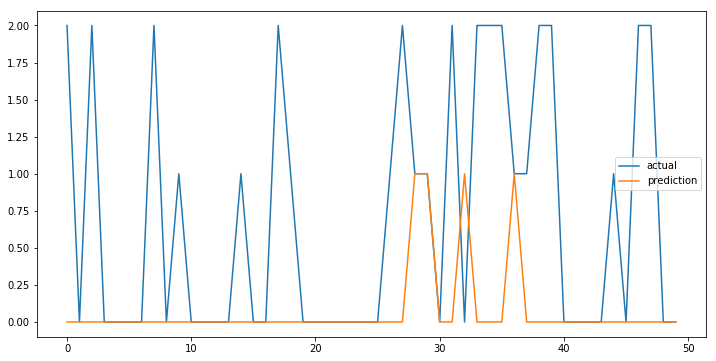

In [11]:
from sklearn.neural_network import MLPClassifier
y_pred = regression(MLPClassifier())

Algoritma berjalan selama:  0.22639203071594238  detik
Akurasi algoritma 47.465753424657535 %
Root Mean Squared Error: 1.1026120916521522
Mean Absolute Error: 0.7554794520547945
Plot is only for first 50 values


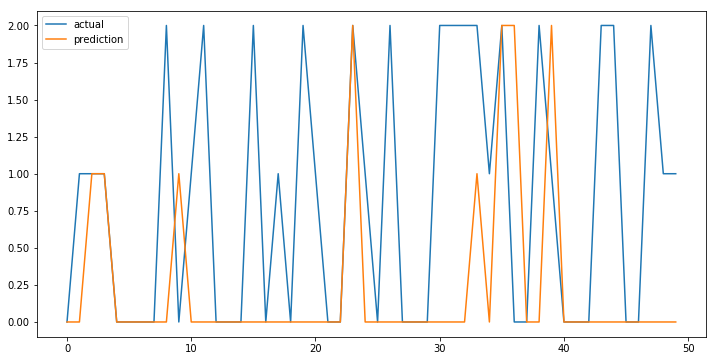

In [25]:
from sklearn.ensemble import RandomForestClassifier
y_pred = regression(RandomForestClassifier())